<a href="https://colab.research.google.com/github/ankitdsi2010/MNIST/blob/master/MNIST_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install helper==2.4.2

import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim
import helper


In [0]:
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

In [0]:
trainset = datasets.MNIST('PATH_TO_STORE_TRAINSET', download=True, train=True, transform=transform)
testset = datasets.MNIST('PATH_TO_STORE_TESTSET', download=True, train=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=32, shuffle=True)

In [4]:
data_tr_it = iter(trainloader)
images, labels = data_tr_it.next()
print(images.shape)
print(labels.shape)

torch.Size([32, 1, 28, 28])
torch.Size([32])


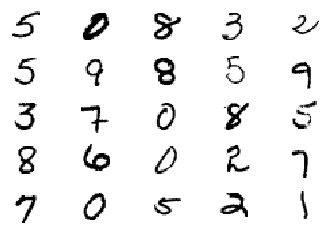

In [5]:
figure = plt.figure()
num_of_images = 25
for index in range(1, num_of_images + 1):
    plt.subplot(5, 5, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

In [9]:
input_size = 784
hidden_sizes = [408, 124, 64]
output_size = 10

class Model(nn.Module):
    def __init__(self, num_inputs = 784, num_outputs = 10, num_hiddens_1 = 408, num_hiddens_2 = 124, num_hiddens_3 = 64, is_training = True):
        super(Model, self).__init__()
        self.num_inputs = num_inputs
        self.num_outputs = num_outputs
        self.num_hiddens_1 = num_hiddens_1
        self.num_hiddens_2 = num_hiddens_2
        self.num_hiddens_3 = num_hiddens_3
        self.linear_1 = nn.Linear(num_inputs, num_hiddens_1)
        self.linear_2 = nn.Linear(num_hiddens_1, num_hiddens_2)
        self.linear_3 = nn.Linear(num_hiddens_2, num_hiddens_3)
        self.linear_4 = nn.Linear(num_hiddens_3, num_outputs)
        self.relu = nn.ReLU()
        self.lsm = nn.LogSoftmax(dim=1)

    def forward(self, X):
        X = X.reshape((-1, self.num_inputs))
        H1 = self.relu(self.linear_1(X))
        H2 = self.relu(self.linear_2(H1))
        H3 = self.relu(self.linear_3(H2))
        out = self.lsm(self.linear_4(H3))
        return out   
    
model = Model()
print(model)

Model(
  (linear_1): Linear(in_features=784, out_features=408, bias=True)
  (linear_2): Linear(in_features=408, out_features=124, bias=True)
  (linear_3): Linear(in_features=124, out_features=64, bias=True)
  (linear_4): Linear(in_features=64, out_features=10, bias=True)
  (relu): ReLU()
  (lsm): LogSoftmax()
)


In [0]:
criterion = nn.NLLLoss()
images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)

logps = model(images) 
loss = criterion(logps, labels) 

In [13]:
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
time0 = time()
epochs = 25
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        images = images.view(images.shape[0], -1)
        optimizer.zero_grad()
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()       
        running_loss += loss.item()
    else:
        print("Epoch {} - Training loss: {}".format(e, running_loss/len(trainloader)))
print("\nTraining Time (in minutes) =",(time()-time0)/60)

Epoch 0 - Training loss: 0.03765070449775085
Epoch 1 - Training loss: 0.03424752893766078
Epoch 2 - Training loss: 0.032021108114471036
Epoch 3 - Training loss: 0.027710536604731655
Epoch 4 - Training loss: 0.025583302308308582
Epoch 5 - Training loss: 0.023580381707513396
Epoch 6 - Training loss: 0.02193341457711067
Epoch 7 - Training loss: 0.01966233695881286
Epoch 8 - Training loss: 0.016739251011788536
Epoch 9 - Training loss: 0.016371974355296696
Epoch 10 - Training loss: 0.013817399365249245
Epoch 11 - Training loss: 0.012748507127988463
Epoch 12 - Training loss: 0.01137182365852835
Epoch 13 - Training loss: 0.009323058403285298
Epoch 14 - Training loss: 0.007952129966383411
Epoch 15 - Training loss: 0.007914753022575556
Epoch 16 - Training loss: 0.006152936108631548
Epoch 17 - Training loss: 0.00557993399889383
Epoch 18 - Training loss: 0.004566327326930817
Epoch 19 - Training loss: 0.004275995912467867
Epoch 20 - Training loss: 0.004117086383375863
Epoch 21 - Training loss: 0.0

Predicted Digit = 1


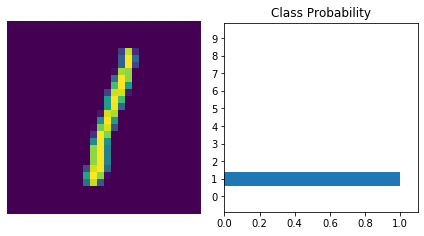

In [16]:
images, labels = next(iter(testloader))
img = images[3].view(1, 784)
with torch.no_grad():
    logps = model(img)
ps = torch.exp(logps)
probab = list(ps.numpy()[0])
print("Predicted Digit =", probab.index(max(probab)))
helper.view_classify(img.view(1, 28, 28), ps)

In [17]:
correct_count, all_count = 0, 0
for images,labels in testloader:
  for i in range(len(labels)):
    img = images[i].view(1, 784)
    with torch.no_grad():
        logps = model(img)
    ps = torch.exp(logps)
    probab = list(ps.numpy()[0])
    pred_label = probab.index(max(probab))
    true_label = labels.numpy()[i]
    if(true_label == pred_label):
      correct_count += 1
    all_count += 1

print("Number Of Images Tested =", all_count)
print("\nModel Accuracy =", (correct_count/all_count))

Number Of Images Tested = 10000

Model Accuracy = 0.9817
